# Project: Customer Purchase Prediction for an Online Store

# 1.	Data Exploration

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:\\MUFG\\Projects\\customer_purchase_data.csv')
print(df)

      customer_id   age  gender  time_on_site  pages_viewed  \
0               1  40.0  Female          5.59             6   
1               2  33.0    Male          7.02             3   
2               3  42.0  Female         20.23             3   
3               4  53.0  Female          0.40             5   
4               5  32.0  Female          6.82             5   
...           ...   ...     ...           ...           ...   
4995         4996  34.0  Female          1.18             4   
4996         4997  43.0    Male          9.31             6   
4997         4998  72.0    Male         39.59             4   
4998         4999  44.0    Male          4.03             5   
4999         5000  24.0  Female          7.84             5   

      previous_purchases device_type traffic_source day_of_week time_of_day  \
0                    1.0      Mobile         Direct      Monday     Morning   
1                    1.0     Desktop         Search      Sunday     Evening   
2     

In [5]:
# Check structure
print(df.shape)


(5000, 12)


In [6]:
print(df.dtypes)


customer_id             int64
age                   float64
gender                 object
time_on_site          float64
pages_viewed            int64
previous_purchases    float64
device_type            object
traffic_source         object
day_of_week            object
time_of_day            object
region                 object
made_purchase           int64
dtype: object


In [7]:
print(df.head())

   customer_id   age  gender  time_on_site  pages_viewed  previous_purchases  \
0            1  40.0  Female          5.59             6                 1.0   
1            2  33.0    Male          7.02             3                 1.0   
2            3  42.0  Female         20.23             3                 2.0   
3            4  53.0  Female          0.40             5                 4.0   
4            5  32.0  Female          6.82             5                 2.0   

  device_type traffic_source day_of_week time_of_day   region  made_purchase  
0      Mobile         Direct      Monday     Morning    North              0  
1     Desktop         Search      Sunday     Evening  Central              1  
2     Desktop         Search      Sunday   Afternoon    South              1  
3      Mobile         Direct      Sunday   Afternoon  Central              1  
4      Tablet         Search   Wednesday     Morning     East              0  


In [8]:
# Check for missing values
print(df.isnull().sum())

customer_id             0
age                   100
gender                  0
time_on_site          100
pages_viewed            0
previous_purchases    100
device_type             0
traffic_source          0
day_of_week             0
time_of_day             0
region                  0
made_purchase           0
dtype: int64


In [9]:
# Basic statistics
print(df.describe())

       customer_id          age  time_on_site  pages_viewed  \
count  5000.000000  4900.000000   4900.000000   5000.000000   
mean   2500.500000    35.045918      7.988124      5.040800   
std    1443.520003    11.096587      7.979240      2.239495   
min       1.000000    18.000000      0.000000      1.000000   
25%    1250.750000    27.000000      2.297500      3.000000   
50%    2500.500000    35.000000      5.470000      5.000000   
75%    3750.250000    42.000000     11.162500      6.000000   
max    5000.000000    75.000000     64.210000     15.000000   

       previous_purchases  made_purchase  
count         4900.000000    5000.000000  
mean             1.995714       0.664200  
std              1.406464       0.472317  
min              0.000000       0.000000  
25%              1.000000       0.000000  
50%              2.000000       1.000000  
75%              3.000000       1.000000  
max              9.000000       1.000000  


#  Step 2: Data Preprocessing

In [11]:
# Fill or drop missing values
df.dropna(inplace=True)  # or use df.fillna(method='ffill')

In [14]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [21]:
# Split features and target
X = df_encoded.drop('made_purchase', axis=1)
y = df_encoded['made_purchase']


In [22]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Exploratory Data Analysis (EDA)

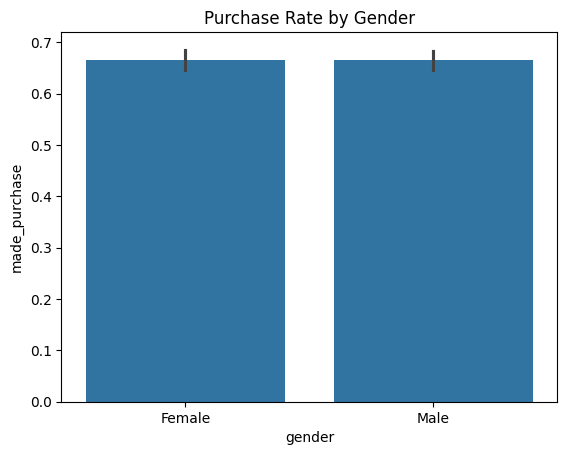

In [24]:
# Purchase rate by Gender
sns.barplot(x='gender', y='made_purchase', data=df)
plt.title('Purchase Rate by Gender')
plt.show()


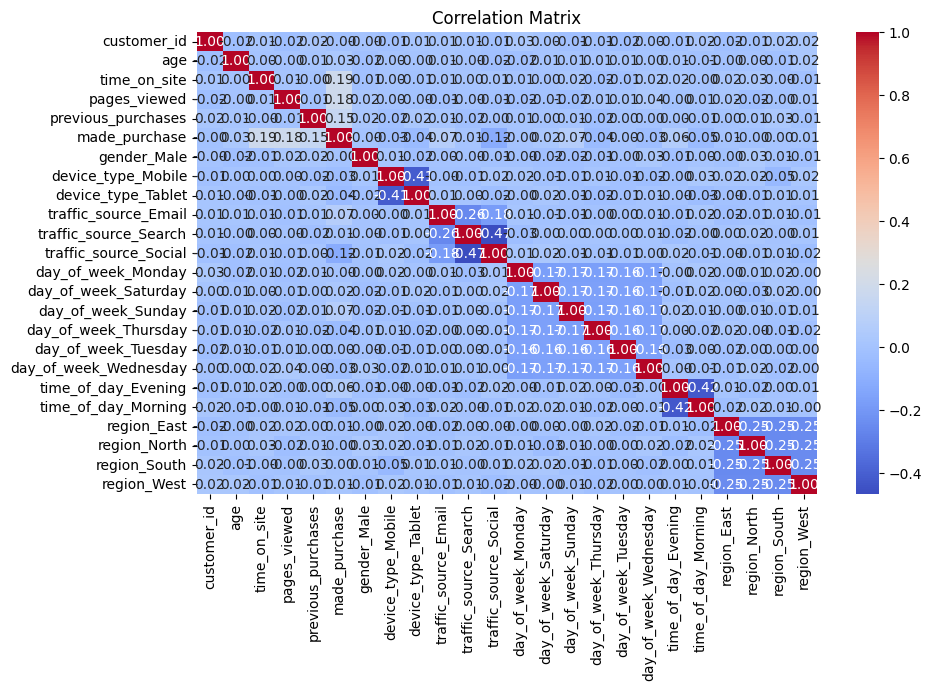

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

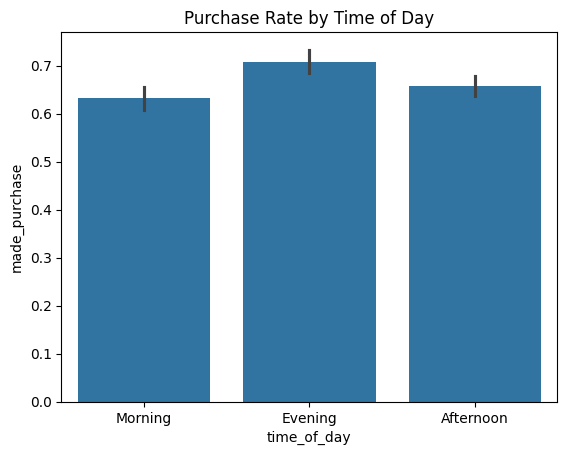

In [27]:
# Purchase rate by Time of Day
sns.barplot(x='time_of_day', y='made_purchase', data=df)
plt.title('Purchase Rate by Time of Day')
plt.show()

# Step 4: Model Building

In [28]:
from sklearn.linear_model import LogisticRegression

# Build and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Optionally experiment with different regularization strengths
# model = LogisticRegression(C=0.5, penalty='l2')

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#  Step 5: Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7034677990092003
Precision: 0.7241079199303743
Recall: 0.8907922912205567
F1 Score: 0.7988478156505041


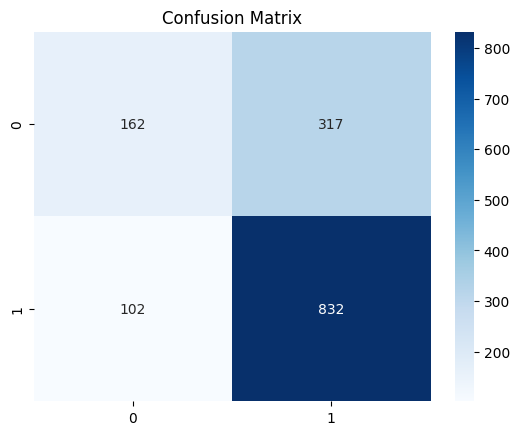

In [30]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

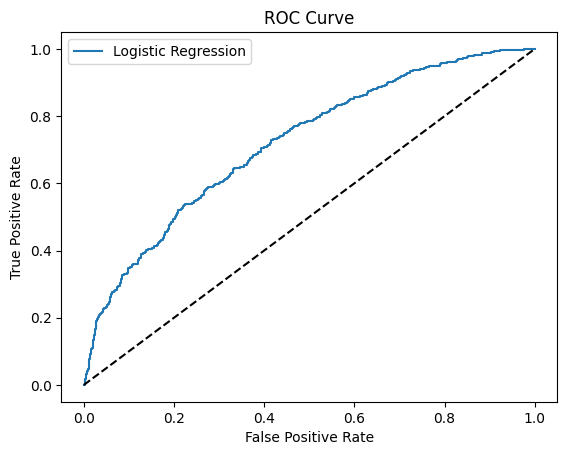

AUC Score: 0.7196179585413938


In [31]:
# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))

# Step 6: Business Insights

# Feature Importance:

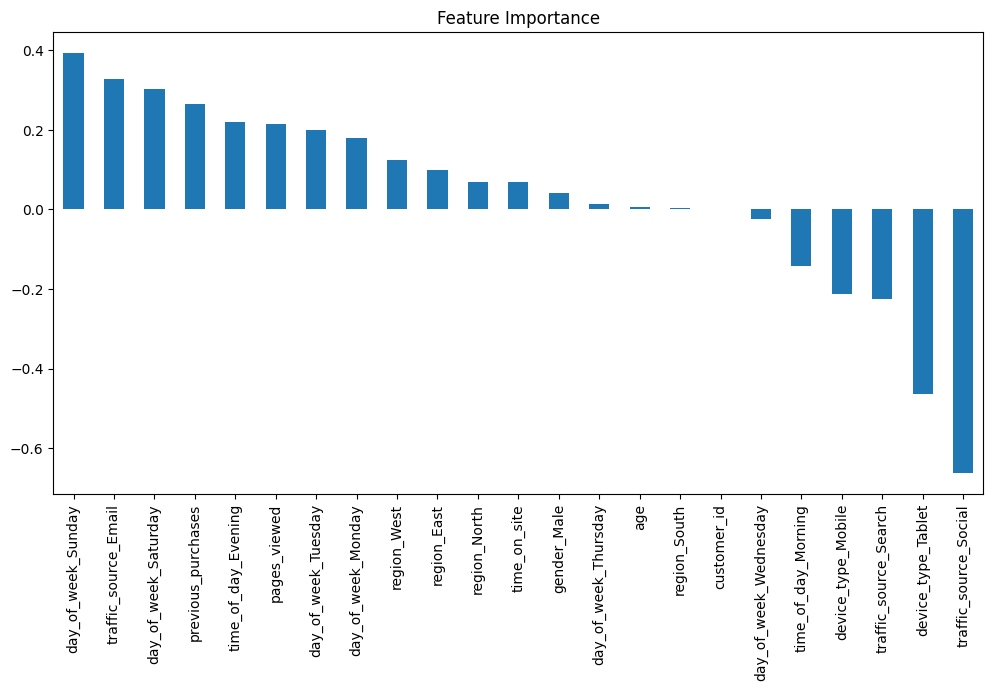

In [32]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance')
plt.show()
